In [9]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [10]:
data = pd.read_csv("globalHotCalendar.csv",encoding="UTF-8")
data = data.where(data.notnull(), 0)
data1 = data.T
df=pd.DataFrame(data1)
rowdata=df.iloc[1:,1:]
rowdata

,1,2,3,4,5,6,7,8,9,10,...,178,179,180,181,182,183,184,185,186,187
2020/1/23,0,0,95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/24,0,0,277,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2020/1/25,0,0,486,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2020/1/26,0,0,669,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/27,0,0,802,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/5/14,10598,13028,5,4298,2307,2437,2659,356,947,264,...,1178,16,1808,3942,1635,380,789,3455,810,643
2020/5/15,9200,17126,9,3891,2840,2112,2502,345,958,227,...,1247,965,2102,3787,1708,755,875,3564,636,515
2020/5/16,9709,13220,6,4046,2736,2075,1886,291,951,226,...,1126,1296,1757,4864,1610,519,675,3457,0,0
2020/5/17,8926,7569,10,3732,2593,2414,2353,279,969,173,...,1079,419,1806,5050,1368,617,451,3534,63,908


In [13]:
mds = MDS(n_components=1,random_state=488).fit_transform(rowdata)
# X_tsne = TSNE(n_components=1,perplexity=30).fit_transform(rowdata)
#df["1d"] =mds[:,0]
rowdata["1d"] =mds[:,0]
estimator = KMeans(n_clusters=5)#构造聚类器
estimator.fit(rowdata)#聚类
label_pred = estimator.labels_ #获取聚类标签
#df["label"] =label_pred
rowdata["label"] =label_pred
df

#b=df.sort_values(by="1d" , ascending=False)
b=rowdata.sort_values(by="1d" , ascending=False)
b

,1,2,3,4,5,6,7,8,9,10,...,180,181,182,183,184,185,186,187,1d,label
2020/5/15,9200,17126,9,3891,2840,2112,2502,345,958,227,...,2102,3787,1708,755,875,3564,636,515,27639.218028,3
2020/5/14,10598,13028,5,4298,2307,2437,2659,356,947,264,...,1808,3942,1635,380,789,3455,810,643,23417.875126,3
2020/5/16,9709,13220,6,4046,2736,2075,1886,291,951,226,...,1757,4864,1610,519,675,3457,0,0,23404.774758,3
2020/5/18,3,14288,9,2660,0,0,2278,0,922,0,...,2294,4630,1158,182,2,2714,358,2,21575.134537,3
2020/5/8,10817,11121,1,3321,1704,1938,1391,585,933,138,...,1556,3344,1848,1158,1083,4652,1284,721,20720.629162,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/4/23,5849,4279,16,1664,1172,1239,516,1496,741,444,...,1030,1707,3116,2481,3021,4608,2323,-10034,-19997.542721,2
2020/5/13,9974,11923,6,4247,2039,2409,2660,307,952,187,...,1958,3763,1639,927,992,3244,-165,849,-20948.946910,2
2020/5/6,11231,11156,2,3628,1793,1982,1032,639,905,533,...,1680,3587,2253,1155,1401,6116,3537,1122,-21394.094327,2
2020/2/13,0,0,15136,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-24143.814492,2


In [14]:
b.to_csv("global_dailyAddSort1d_5.csv",encoding="gbk")

In [34]:
rowdata
mds = MDS(n_components=2,random_state=506).fit_transform(rowdata)
# X_tsne = TSNE(n_components=1,perplexity=30).fit_transform(rowdata)
#df["x"] =mds[:,0]
#df["y"] =mds[:,1]
rowdata["x"] =mds[:,0]
rowdata["y"] =mds[:,1]
rowdata

,1,2,3,4,5,6,7,8,9,10,...,182,183,184,185,186,187,1d,label,x,y
2020/1/23,0,0,95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-306.774590,1,3041.371848,-675.194676
2020/1/24,0,0,277,0,0,0,0,0,0,0,...,0,0,0,0,2,0,-405.783011,1,3211.516671,-632.415062
2020/1/25,0,0,486,0,0,0,0,0,0,0,...,0,0,0,0,1,0,-500.048227,1,3407.721388,-602.791722
2020/1/26,0,0,669,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-582.176469,1,3582.516040,-587.921160
2020/1/27,0,0,802,0,0,0,0,0,0,0,...,0,1,0,0,0,0,-647.367201,1,3707.098764,-570.854956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/5/18,8926,14288,9,2660,2593,2414,2278,279,922,173,...,1158,182,451,2714,358,908,24401.097919,3,-25798.938699,-13065.634150
label,3,3,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,-269.752462,1,2958.858053,-688.973730
1d,46513.6,43240.7,19209.9,14140.6,7747.56,6984.13,6274.69,6018.9,3581.39,2832.74,...,-20965.5,-25724.3,-28660.6,-32407.1,-37249.3,-37694.5,-153916.863506,2,61593.459317,177966.498973
x,39214.7,41931.2,-21273.4,12633.7,6517.89,5801.02,5058.72,-993.374,2249.15,-1559.24,...,7426.07,-3184.29,127.334,16145.7,-7870.72,-14494.9,-99085.702653,2,-26085.775877,118801.196275


In [152]:
b=df.sort_values(by="1d" , ascending=False)
b

KeyError: '1d'

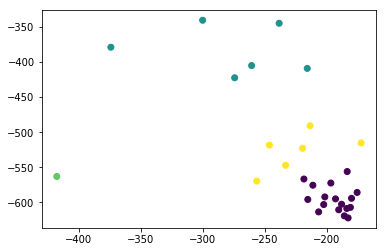

In [10]:
plt.scatter(b['x'][0:-1], b['y'][0:-1],c=b.label[0:-1])#不画湖北
# plt.subplot(133)
# plt.title("3")
# plt.scatter(data3.iloc[:,0], data3.iloc[:,1])
plt.show()